In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path2data="/Users/luizaadelinaciucu/Work/TrackML/"
#df_hits=pd.read_csv(path2data+"event000021069-hits.csv")
eventNumber="000021069"

In [4]:
inputFileName=path2data+"/event"+eventNumber+"-hits.csv"
print("inputFileName",inputFileName)
df_hits_recon=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML//event000021069-hits.csv')


In [5]:
inputFileName=path2data+"/event"+eventNumber+"-truth.csv"
print("inputFileName",inputFileName)
df_hits_truth=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML//event000021069-truth.csv')


In [6]:
inputFileName=path2data+"/event"+eventNumber+"-particles.csv"
print("inputFileName",inputFileName)
df_particles=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML//event000021069-particles.csv')


In [7]:
df_hits_recon.shape

(95224, 7)

In [8]:
df_hits_recon.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-96.0251,-11.043100,-1502.5,7,2,1
1,2,-57.1466,-5.425400,-1502.5,7,2,1
2,3,-83.1498,-9.277450,-1502.5,7,2,1
3,4,-70.7627,-11.261700,-1502.5,7,2,1
4,5,-73.3473,0.070458,-1502.5,7,2,1


In [9]:
df_hits_truth.shape

(95224, 9)

In [10]:
df_hits_truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [11]:
#from annoy import AnnoyIndex
#import random

In [12]:
#df_hits.head()


In [13]:
df_particles.shape

(9003, 10)

In [14]:
#df_truth.head()

In [15]:
#df_particles.tail()

In [16]:
del df_hits_truth['hit_id']

In [17]:
#df_hits.shape

In [18]:
df_hits_truth.shape

(95224, 8)

In [19]:
df_hits_truth.head()

,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [20]:
#df_truth.shape

In [21]:
#df_particles.shape

In [22]:
df_hits = pd.concat([df_hits_recon, df_hits_truth], axis=1, sort=False)

In [23]:
#df=pd.concat([df_hits,df_truth],axis=1)

In [24]:
df_hits.shape

(95224, 15)

In [25]:
#df.head()



In [26]:
df_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [27]:
#def buildAnnoyIndex(data,metric="angular",ntrees=10):
    #f = len(data[0])
    #t = AnnoyIndex(f,metric)  
    #for i,d in enumerate(data):
        #t.add_item(i, d)
    #t.build(ntrees) # 10 trees
    #return t



#data=df[["x","y","z"]].values

#index=buildAnnoyIndex(data,metric="angular",ntrees=10)


#NB_BUCKET=5
#for i in range(NB_BUCKET):
    #n=random.choice(range(len(data)))
    
    #bucket_idx=np.array(index.get_nns_by_item(n,50))
    #bucket=df.iloc[bucket_idx]
    #plt.plot(bucket.x,bucket.y,"o")
    #plt.plot(0,0,"r+")
#plt.show()

In [28]:
BUCKET_SIZE=20
BUCKET_START=0
df_bucket=df_hits[BUCKET_START:BUCKET_START+BUCKET_SIZE]

In [29]:
df_bucket.shape

(20, 15)

In [30]:
df_bucket.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [31]:
df_bucket

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026
5,6,-83.4740,1.129180,-1502.5,7,2,1,616997065959931904,-83.4787,1.105010,-1502.5,-0.488937,-0.021615,-8.70473,0.000009
6,7,-58.1014,-5.149460,-1502.5,7,2,1,747602623384780800,-58.1202,-5.148580,-1502.5,-0.838924,-0.055120,-21.11950,0.000017
7,8,-59.7223,2.597250,-1502.5,7,2,1,333274824921055232,-59.7189,2.573510,-1502.5,-0.436118,-0.005628,-11.64620,0.000010
8,9,-83.0065,-14.131200,-1502.5,7,2,1,450366010051002368,-83.0082,-14.125400,-1502.5,-0.206439,-0.054707,-3.23858,0.000010
9,10,-66.6130,-10.935100,-1502.5,7,2,1,580973766499106816,-66.6009,-10.956200,-1502.5,-0.212149,-0.008676,-4.42666,0.000011


In [32]:
#for i in range(NB_BUCKET):
    #n=random.choice(range(len(data)))
    
    #bucket_idx=np.array(index.get_nns_by_item(n,20))
    #bucket=df.iloc[bucket_idx]
    #for k,v in bucket[["hit_id","x","y","z","particle_id"]].groupby("particle_id"):
        #print (v)
    #print ("-----")
    #print ("i")

In [33]:
df_bucket["particle_id"]

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [34]:
#df

In [35]:
df_bucket["particle_id"]

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [36]:
df_bucket.particle_id

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [37]:
#tuple_most_common=list_tuple_most_common[0]
#tuple_most_common

In [38]:
df_bucket.particle_id.values

array([351284413067165696, 220692736976617472, 193656433244372992,
       693574683580170240, 693560115051102208, 616997065959931904,
       747602623384780800, 333274824921055232, 450366010051002368,
       580973766499106816, 576475664429875200,                  0,
        22553113789464576, 774620304138829824, 423341663507709952,
                        0, 743104246437642240,                  0,
       770117804023087104, 743104246437642240])

In [39]:
#particle_id_most_common=tuple_most_common[0]
#particle_id_most_common

In [40]:
#from collections import Counter
#print ( Counter(df.particle_id.values ) )

In [41]:
from collections import Counter

In [42]:
counter=Counter(df_bucket.particle_id.values)
counter

Counter({0: 3,
         22553113789464576: 1,
         193656433244372992: 1,
         220692736976617472: 1,
         333274824921055232: 1,
         351284413067165696: 1,
         423341663507709952: 1,
         450366010051002368: 1,
         576475664429875200: 1,
         580973766499106816: 1,
         616997065959931904: 1,
         693560115051102208: 1,
         693574683580170240: 1,
         743104246437642240: 2,
         747602623384780800: 1,
         770117804023087104: 1,
         774620304138829824: 1})

In [43]:
list_tuple_most_common=counter.most_common()
list_tuple_most_common

[(0, 3),
 (743104246437642240, 2),
 (351284413067165696, 1),
 (220692736976617472, 1),
 (747602623384780800, 1),
 (770117804023087104, 1),
 (693560115051102208, 1),
 (450366010051002368, 1),
 (580973766499106816, 1),
 (333274824921055232, 1),
 (693574683580170240, 1),
 (423341663507709952, 1),
 (576475664429875200, 1),
 (22553113789464576, 1),
 (774620304138829824, 1),
 (193656433244372992, 1),
 (616997065959931904, 1)]

In [44]:
tuple_most_common=list_tuple_most_common[0]
tuple_most_common

(0, 3)

In [45]:
particle_id_most_common=tuple_most_common[0]
particle_id_most_common

0

In [46]:
hit=df_bucket.iloc[7]
hit

hit_id         8.000000e+00
x             -5.972230e+01
y              2.597250e+00
z             -1.502500e+03
volume_id      7.000000e+00
layer_id       2.000000e+00
module_id      1.000000e+00
particle_id    3.332748e+17
tx            -5.971890e+01
ty             2.573510e+00
tz            -1.502500e+03
tpx           -4.361180e-01
tpy           -5.628240e-03
tpz           -1.164620e+01
weight         1.045220e-05
Name: 7, dtype: float64

In [47]:
hit_id=hit["hit_id"]
hit_id

8.0

In [48]:
particle_id=hit["particle_id"]
particle_id

3.332748249210552e+17

In [49]:
list_input=[]
list_output=[]

# loop over the hits in the bucket
for i in range(df_bucket.shape[0]):
    # we get all a dictionary of names of the columns to values for the i'th row as df_bucket.iloc[i]
    print "i",i,"hit_id",df_bucket.iloc[i]["hit_id"],"x",df_bucket.iloc[i]["x"],"y",df_bucket.iloc[i]["y"],"z",df_bucket.iloc[i]["z"],"particle_id",df_bucket.iloc[i]["particle_id"]
    # now fill the input list, but adding one at a time the values of x, y, z
    list_input.append(df_bucket.iloc[i]["x"])
    list_input.append(df_bucket.iloc[i]["y"])
    list_input.append(df_bucket.iloc[i]["z"])
    # now fill the output list 
    # check if our particle_id is the same as the most common one, if so, choose 1, if not choose 0
    if df_bucket.iloc[i]["particle_id"]==particle_id_most_common:
        output=1
    else:
        output=0
    # add the output to the list
    list_output.append(output)
# done for loop over all the hits in the bucket
# print out the list_input, filled with the x, y, z values
print "list_input",list_input
# let's make sure that it has three times number of elements like the bucket size
print "list_input has so many elements:",len(list_input)
# print out the list_output, filled with either 1 or 0
print "list_output",list_output
# let's make sure that it has the same number of elements like the bucket size
print "list_output has so many elements:",len(list_output)

i 0 hit_id 1.0 x -96.0251 y -11.0431 z -1502.5 particle_id 3.512844130671657e+17
i 1 hit_id 2.0 x -57.1466 y -5.4254 z -1502.5 particle_id 2.2069273697661747e+17
i 2 hit_id 3.0 x -83.1498 y -9.27745 z -1502.5 particle_id 1.93656433244373e+17
i 3 hit_id 4.0 x -70.7627 y -11.2617 z -1502.5 particle_id 6.935746835801702e+17
i 4 hit_id 5.0 x -73.3473 y 0.07045760000000001 z -1502.5 particle_id 6.935601150511022e+17
i 5 hit_id 6.0 x -83.47399999999999 y 1.1291799999999999 z -1502.5 particle_id 6.169970659599319e+17
i 6 hit_id 7.0 x -58.1014 y -5.1494599999999995 z -1502.5 particle_id 7.476026233847808e+17
i 7 hit_id 8.0 x -59.7223 y 2.59725 z -1502.5 particle_id 3.332748249210552e+17
i 8 hit_id 9.0 x -83.0065 y -14.1312 z -1502.5 particle_id 4.503660100510024e+17
i 9 hit_id 10.0 x -66.613 y -10.9351 z -1502.5 particle_id 5.809737664991068e+17
i 10 hit_id 11.0 x -78.6731 y -8.37343 z -1502.5 particle_id 5.764756644298752e+17
i 11 hit_id 12.0 x -31.0244 y -5.73315 z -1502.5 particle_id 0.0
i 

In [50]:
nparray_error_x=df_hits["x"]-df_hits["tx"]
nparray_error_x

0        0.0021
1       -0.0038
2       -0.0118
3       -0.0179
4        0.0108
5        0.0047
6        0.0188
7       -0.0034
8        0.0017
9       -0.0121
10       0.0152
11       0.0011
12       0.0118
13       0.0100
14       0.0040
15       0.0000
16      -0.0010
17      -0.0030
18      -0.0100
19      -0.0050
20       0.0010
21      -0.0040
22       0.0010
23      -0.0010
24       0.0080
25      -0.0100
26      -0.0070
27      -0.0020
28      -0.0070
29      -0.0030
          ...  
95194   -1.9610
95195    1.1550
95196    0.5170
95197   -4.5370
95198   -2.2630
95199   -0.5060
95200   -4.4300
95201    2.7440
95202    0.3430
95203   -0.0920
95204    1.2750
95205    4.2570
95206   -1.7660
95207   -3.4120
95208    0.9640
95209    0.5140
95210    0.2300
95211   -4.2920
95212    4.3120
95213   -1.3010
95214   -3.9190
95215    0.8680
95216    0.2860
95217   -2.0560
95218   -2.5960
95219    3.5810
95220   -3.8060
95221    3.3730
95222   -0.5920
95223   -2.5100
Length: 95224, dtype: fl

(array([  36.,   37.,   46.,   37.,   50.,   38.,   44.,   39.,   29.,
          41.,   44.,   33.,   49.,   47.,   31.,   51.,   55.,   52.,
          55.,   48.,   50.,   62.,   71.,   77.,   89.,   95.,   99.,
         111.,  156.,  160.,  199.,  220.,  204.,  316.,  315.,  387.,
         523.,  664.,  749., 1086., 1554., 1465., 1969., 2404., 2762.,
        4141., 4464., 4621., 5350., 5291., 8162., 5462., 4631., 4581.,
        4159., 2670., 2456., 2093., 1548., 1510., 1053.,  809.,  677.,
         493.,  385.,  353.,  310.,  197.,  192.,  180.,  168.,  151.,
         107.,   92.,  103.,   78.,   81.,   73.,   69.,   37.,   64.,
          64.,   39.,   59.,   42.,   28.,   53.,   39.,   40.,   41.,
          46.,   26.,   36.,   38.,   50.,   38.,   47.,   30.,   38.,
          35.]),
 array([-0.1  , -0.098, -0.096, -0.094, -0.092, -0.09 , -0.088, -0.086,
        -0.084, -0.082, -0.08 , -0.078, -0.076, -0.074, -0.072, -0.07 ,
        -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0

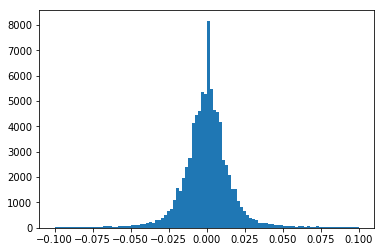

In [51]:
plt.hist(nparray_error_x, bins=100, range=(-0.1,0.1))

In [52]:
nparray_error_y=df_hits["y"]-df_hits["ty"]
nparray_error_y

0       -0.001100
1        0.021580
2        0.015180
3        0.012500
4       -0.000993
5        0.024170
6       -0.000880
7        0.023740
8       -0.005800
9        0.021100
10      -0.019810
11      -0.000520
12       0.002400
13       0.009580
14      -0.020270
15       0.000200
16      -0.021800
17       0.011900
18      -0.001935
19      -0.017800
20      -0.000300
21      -0.012000
22      -0.000300
23       0.000200
24      -0.006400
25      -0.003200
26       0.004600
27       0.000900
28       0.019800
29       0.007900
           ...   
95194    0.946000
95195   -0.538000
95196   -0.214000
95197    2.284000
95198    1.140000
95199    0.235000
95200    2.081000
95201   -1.325000
95202   -0.127000
95203    0.025000
95204   -0.477000
95205   -1.356000
95206    0.580000
95207    1.085000
95208   -0.187000
95209   -0.112000
95210   -0.006000
95211    0.825000
95212   -0.809000
95213    0.213000
95214    0.251000
95215   -0.068800
95216   -0.033000
95217    0.160040
95218    0

(array([  32.,   40.,   25.,   47.,   39.,   27.,   40.,   43.,   29.,
          43.,   48.,   39.,   49.,   53.,   49.,   54.,   67.,   54.,
          53.,   50.,   48.,   67.,   67.,   61.,   85.,   87.,   97.,
         140.,  159.,  151.,  198.,  236.,  217.,  319.,  339.,  370.,
         501.,  660.,  768., 1065., 1526., 1538., 1996., 2378., 2785.,
        4047., 4668., 4706., 5397., 5391., 7876., 5310., 4792., 4645.,
        4051., 2759., 2412., 2006., 1520., 1460., 1119.,  798.,  670.,
         480.,  361.,  340.,  307.,  226.,  251.,  199.,  159.,  143.,
         135.,   83.,  102.,   89.,   59.,   68.,   69.,   56.,   56.,
          42.,   46.,   48.,   47.,   40.,   38.,   29.,   42.,   58.,
          42.,   26.,   42.,   51.,   26.,   34.,   36.,   41.,   31.,
          33.]),
 array([-0.1  , -0.098, -0.096, -0.094, -0.092, -0.09 , -0.088, -0.086,
        -0.084, -0.082, -0.08 , -0.078, -0.076, -0.074, -0.072, -0.07 ,
        -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0

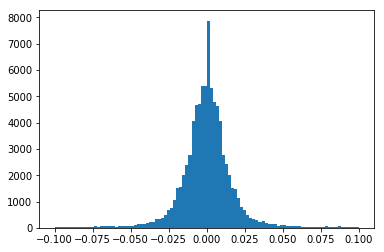

In [53]:
plt.hist(nparray_error_y, bins=100, range=(-0.1,0.1))

In [54]:
nparray_error_z=df_hits["z"]-df_hits["tz"]
nparray_error_z

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
95194    0.0
95195    0.0
95196    0.0
95197    0.0
95198    0.0
95199    0.0
95200    0.0
95201    0.0
95202    0.0
95203    0.0
95204    0.0
95205    0.0
95206    0.0
95207    0.0
95208    0.0
95209    0.0
95210    0.0
95211    0.0
95212    0.0
95213    0.0
95214    0.0
95215    0.0
95216    0.0
95217    0.0
95218    0.0
95219    0.0
95220    0.0
95221    0.0
95222    0.0
95223    0.0
Length: 95224, dtype: float64

(array([1.2300e+02, 1.1000e+01, 1.5000e+01, 2.1000e+01, 1.2600e+02,
        5.7000e+01, 2.2000e+01, 1.3000e+01, 1.8000e+01, 1.0900e+02,
        1.1200e+02, 2.2000e+01, 2.0000e+01, 2.7000e+01, 2.1000e+02,
        1.0300e+02, 3.5000e+01, 2.0000e+01, 3.9000e+01, 2.7500e+02,
        1.9100e+02, 5.0000e+01, 3.3000e+01, 4.1000e+01, 9.6000e+01,
        5.0800e+02, 5.0000e+01, 7.6000e+01, 7.0000e+01, 4.8400e+02,
        3.8300e+02, 8.7000e+01, 9.7000e+01, 1.1500e+02, 5.7300e+02,
        6.4100e+02, 1.5000e+02, 1.5500e+02, 1.3900e+02, 8.5100e+02,
        5.5800e+02, 1.3500e+02, 2.3000e+02, 1.8800e+02, 1.0040e+03,
        8.0200e+02, 1.9700e+02, 1.9000e+02, 2.3100e+02, 1.8900e+02,
        4.4596e+04, 2.3300e+02, 1.7300e+02, 2.0600e+02, 7.9900e+02,
        9.5100e+02, 1.6200e+02, 2.1200e+02, 1.3700e+02, 5.9000e+02,
        9.5900e+02, 1.7100e+02, 1.4000e+02, 1.4600e+02, 6.1800e+02,
        5.9300e+02, 9.5000e+01, 9.6000e+01, 8.7000e+01, 4.0000e+02,
        4.9700e+02, 6.0000e+01, 7.4000e+01, 5.20

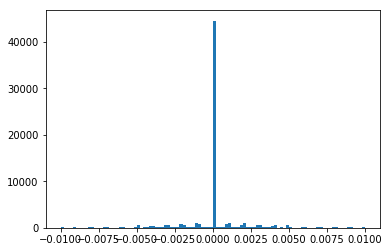

In [55]:
plt.hist(nparray_error_z, bins=100, range=(-0.01,0.01))

In [56]:
def get_list_inputValues(df_bucket,debug):
    list_inputValues=[]
    for i in range (df_bucket.shape[0]):
        hit=df_bucket.iloc[i]
        x=hit["x"]
        y=hit["y"]
        z=hit["z"]
        if debug:
            print "i", i, "x", x, "y", y, "z", z
        list_inputValues.append(x)
        list_inputValues.append(y)
        list_inputValues.append(z)
    return list_inputValues
        

In [57]:
from collections import Counter

In [58]:
def get_particle_id_most_common(df_bucket,debug):
    counter=Counter(df_bucket.particle_id.values)
    list_tuple_most_common=counter.most_common()
    tuple_most_common=list_tuple_most_common[0]
    particle_id_most_common=tuple_most_common[0]
    if debug:
        print "particle_id_most_common",particle_id_most_common
    return particle_id_most_common

In [64]:
def get_list_outputValues(df_bucket,debug):
    list_outputValues=[]
    particle_id_most_common=get_particle_id_most_common(df_bucket,debug)
    for i in range (df_bucket.shape[0]):
        hit=df_bucket.iloc[i]
        particle_id=hit["particle_id"]
        if particle_id==particle_id_most_common:
            output=1
        else:
            output=0
        if debug and False:
            print "i", i, "particle_id", particle_id, "particle_id_most_common", particle_id_most_common, "output", output
        list_outputValues.append(output)
    return list_outputValues


In [66]:
# 95220
nrHits=df_hits.shape[0]
#nrHits=42
debug=False
print "nrHits", nrHits
# keep only complete Buckets
nrBuckets=(nrHits-nrHits%BUCKET_SIZE)/BUCKET_SIZE
print "nrBuckets", nrBuckets
# keep even nr of Buckets for equal size train and test
nrBuckets=nrBuckets-nrBuckets%2
print "nrBuckets", nrBuckets
counterBuckets=0
for i in range (nrHits):
    isMultipleOfBucketSize=i%BUCKET_SIZE==0
    if isMultipleOfBucketSize==False:
        continue
    isCompleteBucket=i+BUCKET_SIZE<nrHits
    if isCompleteBucket==False:
        continue
    isNotLastOddBucket=counterBuckets<nrBuckets
    if isNotLastOddBucket==False:
        continue
    counterBuckets+=1
    print i, isMultipleOfBucketSize, counterBuckets
    df_bucket=df_hits[i:i+BUCKET_SIZE]
    #print "df_bucket", df_bucket
    #list_inputValues=get_list_inputValues(df_bucket,debug)
    #print "list_inputValues", list_inputValues
    list_outputValues=get_list_outputValues(df_bucket,debug=True)
    print "list_outputValues", list_outputValues
#doneforloop
print "counterBuckets", counterBuckets
    

nrHits 95224
nrBuckets 4761
nrBuckets 4760
0 True 1
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
20 True 2
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40 True 3
particle_id_most_common 220692736976617472
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
60 True 4
particle_id_most_common 346780469842411520
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
80 True 5
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
100 True 6
particle_id_most_common 63055617463418880
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
120 True 7
particle_id_most_common 648525561886408704
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
140 True 8
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 1, 0

list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1400 True 71
particle_id_most_common 693567193157206016
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
1420 True 72
particle_id_most_common 139613100276973568
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1440 True 73
particle_id_most_common 126101270602711040
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1460 True 74
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
1480 True 75
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
1500 True 76
particle_id_most_common 621500047112011776
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1520 True 77
particle_id_most_common 292739198459314176
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1540 True 

particle_id_most_common 184649165270155264
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2940 True 148
particle_id_most_common 4530812540157952
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2960 True 149
particle_id_most_common 707073319114899456
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
2980 True 150
particle_id_most_common 360288726103883776
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3000 True 151
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3020 True 152
particle_id_most_common 558450064645685248
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3040 True 153
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
3060 True 154
particle_id_most_common 675548534040166400
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4240 True 213
particle_id_most_common 607994677068562432
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
4260 True 214
particle_id_most_common 693555648285114368
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4280 True 215
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4300 True 216
particle_id_most_common 396326868971683840
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4320 True 217
particle_id_most_common 76562087018496000
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
4340 True 218
particle_id_most_common 337771209003368448
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4360 True 219
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
4380

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5680 True 285
particle_id_most_common 603484549090902016
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5700 True 286
particle_id_most_common 531444684677971968
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5720 True 287
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
5740 True 288
particle_id_most_common 342277763568238592
list_outputValues [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5760 True 289
particle_id_most_common 130605213827465216
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5780 True 290
particle_id_most_common 153130977265188864
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5800 True 291
particle_id_most_common 617005724614000640
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7160 True 359
particle_id_most_common 81066579999064064
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7180 True 360
particle_id_most_common 342274877350215680
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7200 True 361
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
7220 True 362
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7240 True 363
particle_id_most_common 806144951774609408
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7260 True 364
particle_id_most_common 450361130968154112
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7280 True 365
particle_id_most_common 180147902104993792
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7300

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
8600 True 431
particle_id_most_common 139611794606915584
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8620 True 432
particle_id_most_common 765628635485831168
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8640 True 433
particle_id_most_common 580969712049979392
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8660 True 434
particle_id_most_common 180148176982900736
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8680 True 435
particle_id_most_common 238700813294239744
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8700 True 436
particle_id_most_common 216179997658841088
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
8720 True 437
particle_id_most_common 337771277722845184
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10100 True 506
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]
10120 True 507
particle_id_most_common 94577997356466176
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10140 True 508
particle_id_most_common 63068261847138304
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10160 True 509
particle_id_most_common 396326387935346688
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10180 True 510
particle_id_most_common 481898491707129856
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10200 True 511
particle_id_most_common 607988973351993344
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10220 True 512
particle_id_most_common 801647055863808000
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

particle_id_most_common 180147008751796224
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11480 True 575
particle_id_most_common 657528637972545536
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11500 True 576
particle_id_most_common 85572309930213376
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11520 True 577
particle_id_most_common 657528637972545536
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11540 True 578
particle_id_most_common 445857668779737088
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11560 True 579
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
11580 True 580
particle_id_most_common 153126991535538176
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11600 True 581
particle_id_most_common 216179860219887616
list_outputValue

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12960 True 649
particle_id_most_common 648519308414025728
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12980 True 650
particle_id_most_common 220677137655398400
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
13000 True 651
particle_id_most_common 743096274978340864
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13020 True 652
particle_id_most_common 747604066493792256
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13040 True 653
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
13060 True 654
particle_id_most_common 734087976211972096
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13080 True 655
particle_id_most_common 292744421139546112
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14260 True 714
particle_id_most_common 22521777708072960
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14280 True 715
particle_id_most_common 81069534936563712
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14300 True 716
particle_id_most_common 292763593873555456
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14320 True 717
particle_id_most_common 576467486812143616
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14340 True 718
particle_id_most_common 616994179741908992
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
14360 True 719
particle_id_most_common 63051837892198400
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14380 True 720
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15700 True 786
particle_id_most_common 220688476369059840
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15720 True 787
particle_id_most_common 292743184188964864
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15740 True 788
particle_id_most_common 711570871428317184
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15760 True 789
particle_id_most_common 490893802492395520
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15780 True 790
particle_id_most_common 364793150364975104
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15800 True 791
particle_id_most_common 693560870965346304
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15820 True 792
particle_id_most_common 734088457248309248
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16920 True 847
particle_id_most_common 743099779671654400
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16940 True 848
particle_id_most_common 747598568935653376
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16960 True 849
particle_id_most_common 292753560829952000
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16980 True 850
particle_id_most_common 481888115066142720
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17000 True 851
particle_id_most_common 130610505227173888
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17020 True 852
particle_id_most_common 707066584606179328
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17040 True 853
particle_id_most_common 774620853894643712
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0

particle_id_most_common 252204259192340480
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18240 True 913
particle_id_most_common 369302247550484480
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18260 True 914
particle_id_most_common 418838407477723136
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18280 True 915
particle_id_most_common 238691055128543232
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18300 True 916
particle_id_most_common 639516094888935424
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18320 True 917
particle_id_most_common 396327350008020992
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18340 True 918
particle_id_most_common 4520298460217344
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18360 True 919
particle_id_most_common 531429635112566784


list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
19560 True 979
particle_id_most_common 369309119498158080
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19580 True 980
particle_id_most_common 22520472038014976
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19600 True 981
particle_id_most_common 40533702316392448
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19620 True 982
particle_id_most_common 607988492315656192
list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19640 True 983
particle_id_most_common 387313072647176192
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
19660 True 984
particle_id_most_common 369311043643506688
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19680 True 985
particle_id_most_common 184648615514341376
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 

particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
21080 True 1055
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
21100 True 1056
particle_id_most_common 635008097215053824
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
21120 True 1057
particle_id_most_common 108089208555438080
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
21140 True 1058
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
21160 True 1059
particle_id_most_common 616996653643071488
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
21180 True 1060
particle_id_most_common 666534737715658752
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
21200 True 1061
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1

particle_id_most_common 63063451483766784
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22620 True 1132
particle_id_most_common 756605836909871104
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
22640 True 1133
particle_id_most_common 770117185547796480
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22660 True 1134
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
22680 True 1135
particle_id_most_common 9013384007647232
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
22700 True 1136
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
22720 True 1137
particle_id_most_common 180154980211097600
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22740 True 1138
particle_id_most_common 418837789002432512
list_outputValues [1, 0, 0, 

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
23980 True 1200
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24000 True 1201
particle_id_most_common 680044024769282048
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
24020 True 1202
particle_id_most_common 162132266644930560
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24040 True 1203
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24060 True 1204
particle_id_most_common 774627588403363840
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24080 True 1205
particle_id_most_common 301752238869577728
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
24100 True 1206
particle_id_most_common 621497504491372544
list_outputValues [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
25420 True 1272
particle_id_most_common 189161148673687552
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
25440 True 1273
particle_id_most_common 549439498136584192
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
25460 True 1274
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
25480 True 1275
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
25500 True 1276
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
25520 True 1277
particle_id_most_common 270217008434380800
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
25540 True 1278
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
25560 True 1279
particl

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
26920 True 1347
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
26940 True 1348
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
26960 True 1349
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
26980 True 1350
particle_id_most_common 315257952510410752
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
27000 True 1351
particle_id_most_common 0
list_outputValues [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
27020 True 1352
particle_id_most_common 301753681978589184
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
27040 True 1353
particle_id_most_common 4505317614288896
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
27060 True 1354
particle_

list_outputValues [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
28440 True 1423
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
28460 True 1424
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
28480 True 1425
particle_id_most_common 292743871383732224
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
28500 True 1426
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
28520 True 1427
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
28540 True 1428
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
28560 True 1429
particle_id_most_common 693560733526392832
list_outputValues [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
28580 True 1430
particle_id_most_common 

list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
29940 True 1498
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
29960 True 1499
particle_id_most_common 747602004909490176
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
29980 True 1500
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
30000 True 1501
particle_id_most_common 13515884123389952
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
30020 True 1502
particle_id_most_common 450362848955072512
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
30040 True 1503
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
30060 True 1504
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
30080 True 1505
particle

list_outputValues [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
31420 True 1572
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
31440 True 1573
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
31460 True 1574
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
31480 True 1575
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]
31500 True 1576
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
31520 True 1577
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
31540 True 1578
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]
31560 True 1579
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0

particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
32940 True 1648
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
32960 True 1649
particle_id_most_common 0
list_outputValues [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
32980 True 1650
particle_id_most_common 0
list_outputValues [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
33000 True 1651
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
33020 True 1652
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
33040 True 1653
particle_id_most_common 517914919220281344
list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
33060 True 1654
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
33080 True 1655
particle_id_mos

list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
34300 True 1716
particle_id_most_common 229685092824383488
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
34320 True 1717
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
34340 True 1718
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
34360 True 1719
particle_id_most_common 0
list_outputValues [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
34380 True 1720
particle_id_most_common 252204946387107840
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
34400 True 1721
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
34420 True 1722
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
34440 True 1723
particle_id_most_common 

particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
35760 True 1789
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
35780 True 1790
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
35800 True 1791
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
35820 True 1792
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]
35840 True 1793
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
35860 True 1794
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
35880 True 1795
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
35900 True 1796
particle_id_most_common 0
list_o

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37020 True 1852
particle_id_most_common 63061183741034496
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
37040 True 1853
particle_id_most_common 369304446573740032
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37060 True 1854
particle_id_most_common 153129602875654144
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37080 True 1855
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
37100 True 1856
particle_id_most_common 162133366156558336
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37120 True 1857
particle_id_most_common 324262540425035776
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
37140 True 1858
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38320 True 1917
particle_id_most_common 292756378328498176
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38340 True 1918
particle_id_most_common 63059259595685888
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38360 True 1919
particle_id_most_common 396334221955694592
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38380 True 1920
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
38400 True 1921
particle_id_most_common 716073508983013376
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38420 True 1922
particle_id_most_common 315255822206631936
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38440 True 1923
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
39760 True 1989
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
39780 True 1990
particle_id_most_common 337772720831856640
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
39800 True 1991
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
39820 True 1992
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
39840 True 1993
particle_id_most_common 337772720831856640
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
39860 True 1994
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
39880 True 1995
particle_id_most_common 40535695181217792
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
39900 True 1996
particle

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41040 True 2053
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
41060 True 2054
particle_id_most_common 22523770572898304
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41080 True 2055
particle_id_most_common 256707102905466880
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41100 True 2056
particle_id_most_common 576464531874643968
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41120 True 2057
particle_id_most_common 301752101430624256
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41140 True 2058
particle_id_most_common 13510936321064960
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
41160 True 2059
particle_id_most_common 580966001198235648
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0

particle_id_most_common 607994196032225280
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42540 True 2128
particle_id_most_common 63069292639289344
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42560 True 2129
particle_id_most_common 292737961508732928
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42580 True 2130
particle_id_most_common 616995210534060032
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42600 True 2131
particle_id_most_common 423339739362361344
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42620 True 2132
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42640 True 2133
particle_id_most_common 522422642016256000
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42660 True 2134
particle_id_most_common 279231423234179072
list_outp

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
44060 True 2204
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
44080 True 2205
particle_id_most_common 346787273070608384
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
44100 True 2206
particle_id_most_common 607999762309840896
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
44120 True 2207
particle_id_most_common 153136199945420800
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
44140 True 2208
particle_id_most_common 180153262224179200
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
44160 True 2209
particle_id_most_common 301759042097774592
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
44180 True 2210
particle_id_most_common 607989591827283968
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

particle_id_most_common 369304652732170240
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45460 True 2274
particle_id_most_common 382807342716026880
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45480 True 2275
particle_id_most_common 423348191857999872
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
45500 True 2276
particle_id_most_common 108091407578693632
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45520 True 2277
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45540 True 2278
particle_id_most_common 324260410121256960
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
45560 True 2279
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
45580 True 2280
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1,

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
46900 True 2346
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
46920 True 2347
particle_id_most_common 693587671561273344
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
46940 True 2348
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
46960 True 2349
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
46980 True 2350
particle_id_most_common 580966207356665856
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
47000 True 2351
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
47020 True 2352
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
47040 True 2353
particle_id_most_common 

particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
48340 True 2418
particle_id_most_common 675553413123014656
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
48360 True 2419
particle_id_most_common 639521248849690624
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
48380 True 2420
particle_id_most_common 666542090699669504
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
48400 True 2421
particle_id_most_common 333274000287334400
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
48420 True 2422
particle_id_most_common 387312454171885568
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
48440 True 2423
particle_id_most_common 369302316269961216
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
48460 True 2424
particle_id_most_common 0
list_outputValues [0, 0, 

list_outputValues [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
49780 True 2490
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
49800 True 2491
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
49820 True 2492
particle_id_most_common 0
list_outputValues [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
49840 True 2493
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
49860 True 2494
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
49880 True 2495
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
49900 True 2496
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
49920 True 2497
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 1

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
51140 True 2558
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
51160 True 2559
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
51180 True 2560
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
51200 True 2561
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
51220 True 2562
particle_id_most_common 490897788222046208
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
51240 True 2563
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
51260 True 2564
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
51280 True 2565
particle_id_most_common 0
list_outputValu

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
52640 True 2633
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
52660 True 2634
particle_id_most_common 319757222810746880
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
52680 True 2635
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
52700 True 2636
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
52720 True 2637
particle_id_most_common 0
list_outputValues [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
52740 True 2638
particle_id_most_common 0
list_outputValues [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
52760 True 2639
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
52780 True 2640
particle_id_most_common 0
list_outputValu

particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
54000 True 2701
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
54020 True 2702
particle_id_most_common 4548817043062784
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
54040 True 2703
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
54060 True 2704
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
54080 True 2705
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
54100 True 2706
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
54120 True 2707
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
54140 True 2708
particle_id_most_

particle_id_most_common 396324257631567872
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
55340 True 2768
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
55360 True 2769
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
55380 True 2770
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
55400 True 2771
particle_id_most_common 333269327362916352
list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
55420 True 2772
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
55440 True 2773
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
55460 True 2774
particle_id_most_common 63074377880567808
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
56720 True 2837
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
56740 True 2838
particle_id_most_common 396345148352495616
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
56760 True 2839
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
56780 True 2840
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
56800 True 2841
particle_id_most_common 693566093645578240
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
56820 True 2842
particle_id_most_common 707071532425289730
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
56840 True 2843
particle_id_most_common 112590265562169344
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
56860 

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
58160 True 2909
particle_id_most_common 126103881942827008
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
58180 True 2910
particle_id_most_common 22528718392004609
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
58200 True 2911
particle_id_most_common 774625801696968704
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
58220 True 2912
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
58240 True 2913
particle_id_most_common 364796448933421058
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
58260 True 2914
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
58280 True 2915
particle_id_most_common 301758904658821120
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

list_outputValues [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
59500 True 2976
particle_id_most_common 607993921171103746
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
59520 True 2977
particle_id_most_common 0
list_outputValues [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
59540 True 2978
particle_id_most_common 0
list_outputValues [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
59560 True 2979
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
59580 True 2980
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
59600 True 2981
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
59620 True 2982
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
59640 True 2983
particle_id_most_common 0
list_outputValu

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
60900 True 3046
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
60920 True 3047
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
60940 True 3048
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
60960 True 3049
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
60980 True 3050
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
61000 True 3051
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
61020 True 3052
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
61040 True 3053
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0

list_outputValues [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
62280 True 3115
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
62300 True 3116
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
62320 True 3117
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
62340 True 3118
particle_id_most_common 49539939515244546
list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
62360 True 3119
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
62380 True 3120
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
62400 True 3121
particle_id_most_common 481897323492806657
list_outputValues [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
62420 True 3122
particle_id_most_common 0

list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
63720 True 3187
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]
63740 True 3188
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
63760 True 3189
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
63780 True 3190
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
63800 True 3191
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
63820 True 3192
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
63840 True 3193
particle_id_most_common 252204946387107840
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
63860 True 3194
particle_id_most_common 0
list_outputValu

list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
65360 True 3269
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]
65380 True 3270
particle_id_most_common 481886809396084736
list_outputValues [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
65400 True 3271
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
65420 True 3272
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
65440 True 3273
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
65460 True 3274
particle_id_most_common 0
list_outputValues [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
65480 True 3275
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
65500 True 3276
particle_id_most_common 0
list_outputValu

list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]
66720 True 3337
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
66740 True 3338
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
66760 True 3339
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
66780 True 3340
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
66800 True 3341
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
66820 True 3342
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]
66840 True 3343
particle_id_most_common 0
list_outputValues [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
66860 True 3344
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0

list_outputValues [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
68080 True 3405
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
68100 True 3406
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
68120 True 3407
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]
68140 True 3408
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
68160 True 3409
particle_id_most_common 801643001431470082
list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
68180 True 3410
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
68200 True 3411
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
68220 True 3412
particle_id_most_common 0
list_outputValu

list_outputValues [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
69500 True 3476
particle_id_most_common 0
list_outputValues [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
69520 True 3477
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
69540 True 3478
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
69560 True 3479
particle_id_most_common 0
list_outputValues [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
69580 True 3480
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
69600 True 3481
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
69620 True 3482
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]
69640 True 3483
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 0

list_outputValues [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
71060 True 3554
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
71080 True 3555
particle_id_most_common 0
list_outputValues [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]
71100 True 3556
particle_id_most_common 0
list_outputValues [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
71120 True 3557
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
71140 True 3558
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
71160 True 3559
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
71180 True 3560
particle_id_most_common 0
list_outputValues [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
71200 True 3561
particle_id_most_common 0
list_outputValues [1, 1, 0, 0, 1

particle_id_most_common 0
list_outputValues [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0]
72740 True 3638
particle_id_most_common 0
list_outputValues [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
72760 True 3639
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]
72780 True 3640
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
72800 True 3641
particle_id_most_common 0
list_outputValues [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
72820 True 3642
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
72840 True 3643
particle_id_most_common 0
list_outputValues [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
72860 True 3644
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
72880 True 3645
particle_id_most_common 0
list_o

list_outputValues [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]
74140 True 3708
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
74160 True 3709
particle_id_most_common 0
list_outputValues [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
74180 True 3710
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0]
74200 True 3711
particle_id_most_common 0
list_outputValues [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
74220 True 3712
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
74240 True 3713
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]
74260 True 3714
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]
74280 True 3715
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 1

list_outputValues [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
75660 True 3784
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
75680 True 3785
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
75700 True 3786
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
75720 True 3787
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
75740 True 3788
particle_id_most_common 315255684767678464
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
75760 True 3789
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
75780 True 3790
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
75800 True 3791
particle_id_most_common 0
list_outputValu

list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
77220 True 3862
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
77240 True 3863
particle_id_most_common 0
list_outputValues [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
77260 True 3864
particle_id_most_common 216177936074539008
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
77280 True 3865
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
77300 True 3866
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
77320 True 3867
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
77340 True 3868
particle_id_most_common 616995141814583296
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
77360 True 3869
particle_id_most_common 

list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
78600 True 3931
particle_id_most_common 22527275266211840
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
78620 True 3932
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
78640 True 3933
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
78660 True 3934
particle_id_most_common 450369377305362432
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
78680 True 3935
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
78700 True 3936
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
78720 True 3937
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
78740 True 3938
particle_id_most_common 5

list_outputValues [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
80040 True 4003
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
80060 True 4004
particle_id_most_common 346777583624388608
list_outputValues [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
80080 True 4005
particle_id_most_common 756607348738359296
list_outputValues [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
80100 True 4006
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
80120 True 4007
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
80140 True 4008
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
80160 True 4009
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
80180 True 4010
particle_id_most_common 

list_outputValues [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
81440 True 4073
particle_id_most_common 504403433143402496
list_outputValues [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
81460 True 4074
particle_id_most_common 490893596333965312
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
81480 True 4075
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
81500 True 4076
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
81520 True 4077
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
81540 True 4078
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
81560 True 4079
particle_id_most_common 783629564977872896
list_outputValues [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
81580 True 4080
particl

list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
82900 True 4146
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
82920 True 4147
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
82940 True 4148
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
82960 True 4149
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
82980 True 4150
particle_id_most_common 522424016405790720
list_outputValues [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
83000 True 4151
particle_id_most_common 648520133047746560
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
83020 True 4152
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
83040 True 4153
particle_id_most_common 

list_outputValues [0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1]
84360 True 4219
particle_id_most_common 0
list_outputValues [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
84380 True 4220
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
84400 True 4221
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
84420 True 4222
particle_id_most_common 0
list_outputValues [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]
84440 True 4223
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
84460 True 4224
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
84480 True 4225
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
84500 True 4226
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 1

particle_id_most_common 0
list_outputValues [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
85900 True 4296
particle_id_most_common 0
list_outputValues [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
85920 True 4297
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
85940 True 4298
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]
85960 True 4299
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
85980 True 4300
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
86000 True 4301
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
86020 True 4302
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
86040 True 4303
particle_id_most_common 0
list_o

list_outputValues [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]
87580 True 4380
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
87600 True 4381
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0]
87620 True 4382
particle_id_most_common 0
list_outputValues [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
87640 True 4383
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]
87660 True 4384
particle_id_most_common 0
list_outputValues [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
87680 True 4385
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]
87700 True 4386
particle_id_most_common 0
list_outputValues [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
87720 True 4387
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 1

list_outputValues [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
89000 True 4451
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
89020 True 4452
particle_id_most_common 0
list_outputValues [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
89040 True 4453
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
89060 True 4454
particle_id_most_common 0
list_outputValues [0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
89080 True 4455
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
89100 True 4456
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
89120 True 4457
particle_id_most_common 0
list_outputValues [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
89140 True 4458
particle_id_most_common 0
list_outputValues [0, 1, 1, 0, 0

list_outputValues [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
90460 True 4524
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
90480 True 4525
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]
90500 True 4526
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
90520 True 4527
particle_id_most_common 0
list_outputValues [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]
90540 True 4528
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
90560 True 4529
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]
90580 True 4530
particle_id_most_common 0
list_outputValues [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]
90600 True 4531
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 1

list_outputValues [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
92040 True 4603
particle_id_most_common 0
list_outputValues [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
92060 True 4604
particle_id_most_common 0
list_outputValues [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
92080 True 4605
particle_id_most_common 0
list_outputValues [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
92100 True 4606
particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
92120 True 4607
particle_id_most_common 0
list_outputValues [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
92140 True 4608
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
92160 True 4609
particle_id_most_common 0
list_outputValues [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
92180 True 4610
particle_id_most_common 0
list_outputValues [1, 1, 0, 1, 1

particle_id_most_common 0
list_outputValues [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
93580 True 4680
particle_id_most_common 0
list_outputValues [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
93600 True 4681
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
93620 True 4682
particle_id_most_common 0
list_outputValues [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
93640 True 4683
particle_id_most_common 0
list_outputValues [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
93660 True 4684
particle_id_most_common 238696827564589056
list_outputValues [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
93680 True 4685
particle_id_most_common 0
list_outputValues [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]
93700 True 4686
particle_id_most_common 0
list_outputValues [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
93720 True 4687
particle_id_mos

list_outputValues [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
95160 True 4759
particle_id_most_common 0
list_outputValues [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
95180 True 4760
particle_id_most_common 0
list_outputValues [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
counterBuckets 4760
